In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
#preprosess モジュールのインポート
from sklearn import preprocessing
#データ分割用
from sklearn.model_selection import train_test_split
#ロジスティック回帰モデル作成のため
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#可視化のため
import seaborn as sns
import matplotlib.pyplot as plt
#データ読み込み
df = pd.read_csv('UCI_Credit_Card.csv')
#要約確認
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [2]:
#train test データ分離
X = df.drop(
    [
        'ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
        'default.payment.next.month'
    ],
    axis=1)
y = df['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

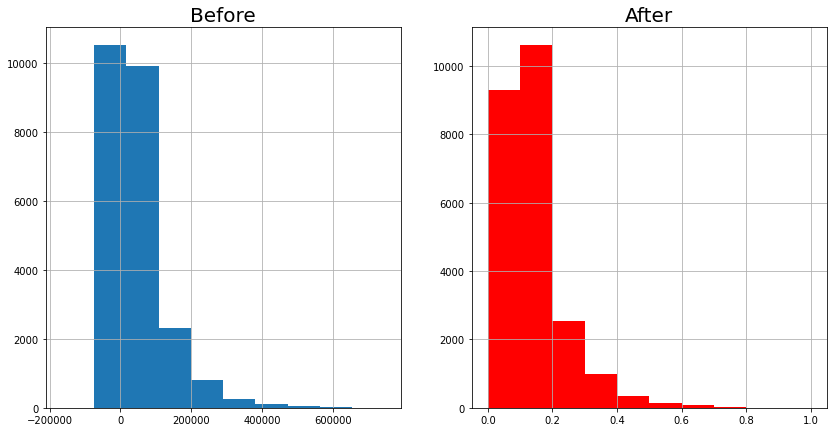

In [3]:
#MinMaxScalerのインスタンス化
min_max_scaler = preprocessing.MinMaxScaler()
# train
X_train_min_max = min_max_scaler.fit_transform(X_train)
# test trainを基準にしないとリークしてしまう
X_test_min_max = min_max_scaler.transform(X_test)

#分布描画
fontdic = {'size': 20}
plt.figure(figsize=(14, 7))
#変換前
plt.subplot(1, 2, 1)
plt.hist(X_train['BILL_AMT1'])
plt.title('Before', fontdict=fontdic)
plt.grid()
#変換後
plt.subplot(1, 2, 2)
plt.hist(X_train_min_max[:, 8], color='red')
plt.title('After', fontdict=fontdic)
plt.grid()

In [4]:
X_train

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
3225,20000.0,0,0,2,0,0,-2,17095.0,19112.0,17980.0,18780.0,0.0,0.0,3000.0,0.0,1000.0,1000.0,0.0,0.0
11815,260000.0,-1,-1,-1,-1,-1,-1,165.0,165.0,274.0,165.0,333.0,165.0,165.0,274.0,165.0,333.0,165.0,293.0
7338,20000.0,2,0,0,0,0,0,20264.0,20328.0,19299.0,19928.0,20204.0,20398.0,1500.0,1500.0,900.0,700.0,1480.0,0.0
14980,30000.0,2,2,2,2,2,2,28224.0,29276.0,28635.0,30127.0,30525.0,29793.0,1800.0,150.0,2250.0,1000.0,0.0,700.0
27167,10000.0,0,0,0,0,0,0,8275.0,8409.0,8600.0,9470.0,6690.0,9690.0,2800.0,2000.0,1500.0,900.0,3000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,30000.0,0,0,0,0,0,0,26825.0,18401.0,18432.0,17844.0,18237.0,10900.0,2100.0,2500.0,1000.0,1000.0,3000.0,7002.0
19648,210000.0,0,0,0,0,0,0,199851.0,190551.0,192717.0,195700.0,150525.0,137565.0,7000.0,7791.0,7000.0,5254.0,5400.0,5380.0
9845,130000.0,0,0,0,0,0,2,74020.0,71527.0,66370.0,43882.0,41063.0,29215.0,5000.0,3000.0,2500.0,4100.0,0.0,5000.0
10799,50000.0,0,0,0,0,0,0,45561.0,47322.0,49054.0,7378.0,8103.0,8963.0,2500.0,3125.0,417.0,1000.0,1000.0,500.0


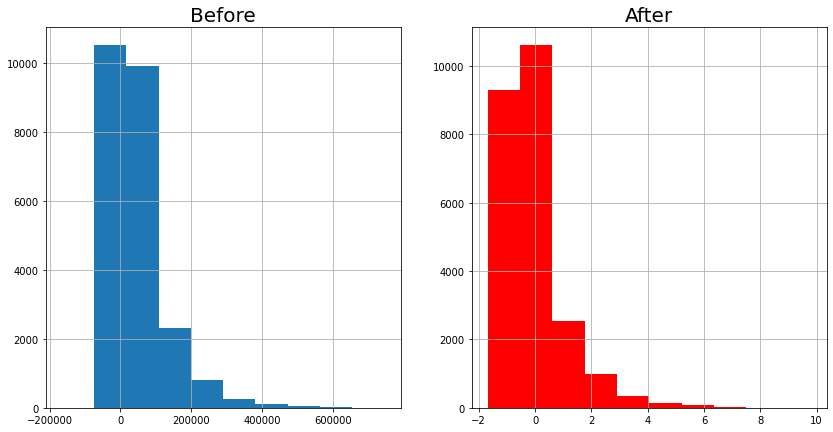

In [14]:
#zスコア変換
standard_scaler = preprocessing.StandardScaler()  
# train
X_train_standard = standard_scaler.fit_transform(X_train)
# test trainを基準にしないとリークしてしまう
X_test_standard = standard_scaler.transform(X_test)

#分布描画
fontdic = {'size': 20}
plt.figure(figsize=(14, 7))
#変換前
plt.subplot(1, 2, 1)
plt.hist(X_train['BILL_AMT1'])
plt.title('Before', fontdict=fontdic)
plt.grid()
#変換後
plt.subplot(1, 2, 2)
plt.hist(X_train_standard[:, 8], color='red')
plt.title('After', fontdict=fontdic)
plt.grid()

In [15]:
#10進変換
#変換用の関数作成
def decimal_fit_trans(x):
    #絶対値の最大値をカラムごとに取得
    temp = np.nanmax(np.abs(x.values),axis=0)
    arr = np.array([])
    #カラムごとに除する定数を取得
    for t in temp:
        i = 0
        while t/10**(i) > 1:
            i += 1
        arr = np.r_[arr,1/10**(i)]
    return  (arr)

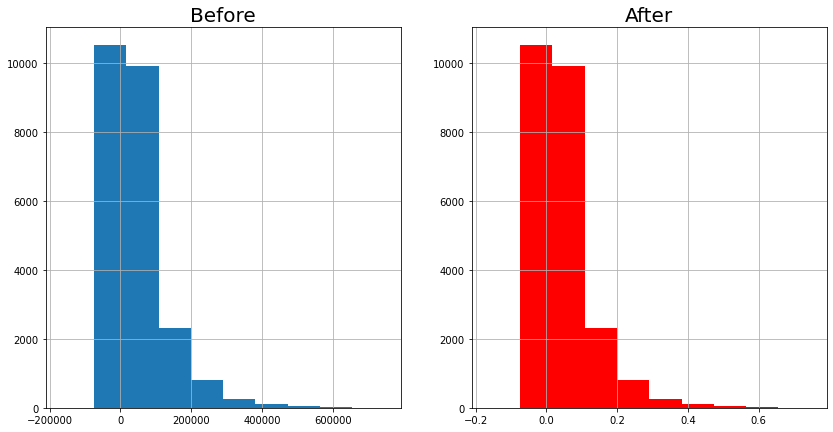

In [16]:
#train
X_train_decimal = X_train*decimal_fit_trans(X_train)
#test  
X_test_decimal = X_test*decimal_fit_trans(X_train)
#分布描画
fontdic = {'size':20}
plt.figure(figsize=(14,7))
#変換前
plt.subplot(1,2,1)
plt.hist(X_train['BILL_AMT1'])
plt.title('Before',fontdict=fontdic)
plt.grid()
#変換後
plt.subplot(1,2,2)
plt.hist(X_train_decimal['BILL_AMT1'],color='red')
plt.title('After',fontdict=fontdic)
plt.grid()

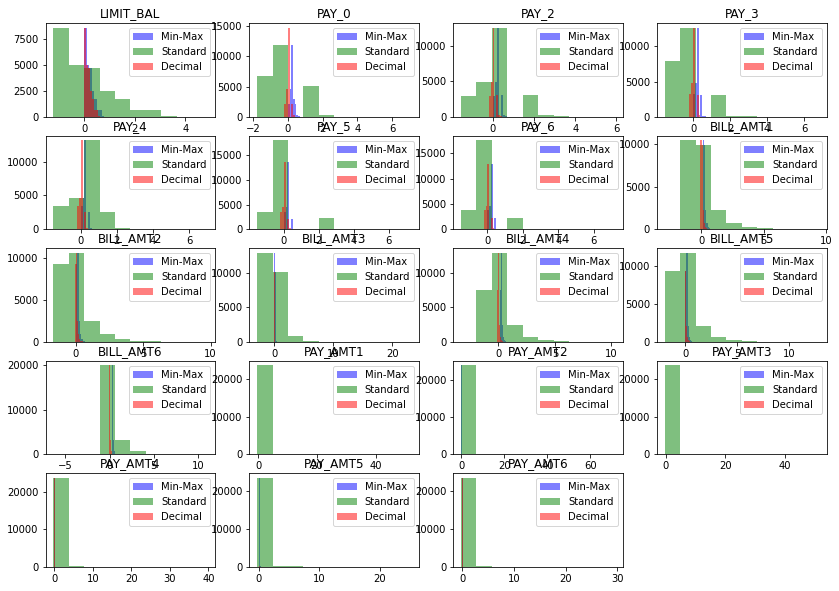

In [17]:
#変換後比較
plt.figure(figsize=(14, 10))
for i, col in enumerate(X_train.columns):
    plt.subplot(5, 4, i + 1)
    plt.hist(
        pd.DataFrame(X_train_min_max, columns=X_train.columns)[col],
        color='blue',
        alpha=0.5,
        label='Min-Max')
    plt.hist(
        pd.DataFrame(X_train_standard, columns=X_train.columns)[col],
        color='green',
        alpha=0.5,
        label='Standard')
    plt.hist(X_train_decimal[col], color='red', alpha=0.5, label='Decimal')
    plt.title(col)
    plt.legend()

In [18]:
#モデルの生成
clf = LogisticRegression()
# 精度を格納するリスト
l = []
# 学習
#スケーリングなし
clf.fit(X_train, y_train)
l.append(accuracy_score(y_test, clf.predict(X_test)))
#min_max変換
clf.fit(X_train_min_max, y_train)
l.append(accuracy_score(y_test, clf.predict(X_test_min_max)))
#zスコア変換
clf.fit(X_train_standard, y_train)
l.append(accuracy_score(y_test, clf.predict(X_test_standard)))
#10進変換
clf.fit(X_train_decimal, y_train)
l.append(accuracy_score(y_test, clf.predict(X_test_decimal)))
# 精度一覧
print(l)

[0.7838333333333334, 0.8145, 0.817, 0.8141666666666667]
